In [1]:
import pandas as pd

In [2]:
play_df = pd.read_csv("data/plays.csv")

In [3]:
games_df = pd.read_csv("data/games.csv")

In [4]:
max_num_weeks = 17
week_list = []
for i in range(max_num_weeks):
    week_list.append(pd.read_csv(f"data/week{i + 1}.csv"))

In [5]:
play_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [6]:
play_df.penaltyCodes.value_counts()

DPI         242
DH          241
RPS         104
OPI          96
OH           94
           ... 
ICT;DPI       1
DSQ           1
UNS;UNSd      1
RPS;UNR       1
OH;IBB        1
Name: penaltyCodes, Length: 86, dtype: int64

In [7]:
pd.set_option('display.max_rows', None)

play_df.penaltyCodes = play_df.penaltyCodes.replace(to_replace='DPI;(.*)|(.*);DPI', value='DPI', regex=True)
play_df.penaltyCodes.value_counts()

DPI             259
DH              241
RPS             104
OPI              96
OH               94
UNRd             58
ICT              50
DOF              31
ING              27
FMM              26
IBW              23
UNR              19
ILHd             13
UNSd             13
IDP              10
TAU              10
ILF              10
ISH               9
UNS               9
UOHd              8
OH;DH             7
TAUd              7
ITP               4
OH;RPS            4
DSQd              4
DH;OH             4
HC                3
DOG               3
IBB               3
TRP               2
ILH               2
DH;OPI            2
DH;UNSd           2
ILM               2
ICT;ICT           2
DH;DH             2
DTM               2
OPI;OH            2
DOF;RPS           2
RPS;UNRd          1
IBW;OH            1
UNRd;UNR          1
UNR;UNRd          1
FMM;HC            1
TAU;TAUd;TAU      1
DH;ICT            1
ICT;TAU           1
RPS;ICT           1
RPS;DOF           1
TAUd;DH           1


In [8]:
dpi_df = play_df[play_df.penaltyCodes == 'DPI']
dpi_df.shape

(259, 27)

In [12]:
dpi_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [13]:
games_df.columns

Index(['gameId', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr',
       'visitorTeamAbbr', 'week'],
      dtype='object')

In [14]:
dpi_games_df = dpi_df.merge(games_df, how='left', on='gameId')
dpi_games_df.head()
dpi_games_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa', 'isDefensivePI',
       'gameDate', 'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr',
       'week'],
      dtype='object')

In [20]:
st1_week = dpi_games_df[(dpi_games_df.penaltyCodes == 'DPI') & (dpi_games_df.week == 1)]
print(st1_week.shape)
print(dpi_games_df.shape)

(16, 32)
(259, 32)


In [12]:
# Merge tracking data with DPI plays
dpi_clean_df = pd.DataFrame()
for index, row in dpi_games_df.iterrows():
    corr_week = week_list[row.week - 1]
    play_data_df = corr_week[corr_week.playId == row.playId]
    # get dataframe format
    row_df = dpi_games_df[dpi_games_df.index == index]
    merge_play_week = play_data_df.merge(row_df, how='left', on='playId')
    dpi_clean_df = dpi_clean_df.append(merge_play_week)

In [13]:
dpi_clean_df.shape

(298401, 50)

In [14]:
dpi_clean_df.to_csv('data/cleaned/dpi.csv')

In [15]:
dpi_clean_df.columns

Index(['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'frameId', 'team',
       'gameId_x', 'playId', 'playDirection', 'route', 'gameId_y',
       'playDescription', 'quarter', 'down', 'yardsToGo', 'possessionTeam',
       'playType', 'yardlineSide', 'yardlineNumber', 'offenseFormation',
       'personnelO', 'defendersInTheBox', 'numberOfPassRushers', 'personnelD',
       'typeDropback', 'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa', 'isDefensivePI',
       'gameDate', 'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr',
       'week'],
      dtype='object')

<BarContainer object of 17 artists>

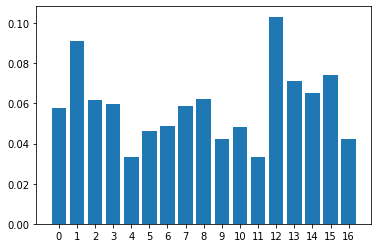

In [16]:
dpi_h = dpi_clean_df[dpi_clean_df.isDefensivePI == True].week.value_counts(sort=False)
import matplotlib.pyplot as plt
sum_val = dpi_h.sum()
plt.xticks(range(dpi_h.shape[0]))
plt.bar(range(dpi_h.shape[0]), dpi_h / sum_val)

In [17]:
play_df.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [18]:
non_dpi_plays = play_df[play_df.isDefensivePI == False]
non_dpi_games_df = non_dpi_plays.merge(games_df, how='left', on='gameId')
non_dpi_games_df.head()
non_dpi_games_df.columns
#non_dpi_games_df.shape

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa', 'isDefensivePI',
       'gameDate', 'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr',
       'week'],
      dtype='object')

## Idemo ovdje napraviti dataset koji ce imati podatke za prva 4 tjedna


In [19]:
import time


class TimerError(Exception):
    """A custom exception used to report errors in use of Timer class"""

class Timer:

    def __init__(self):
        self._start_time = None

    def start(self):

        """Start a new timer"""
        if self._start_time is not None:
            raise TimerError(f"Timer is running. Use .stop() to stop it")

        self._start_time = time.perf_counter()

    def stop(self):
        """Stop the timer, and report the elapsed time"""
        if self._start_time is None:
            raise TimerError(f"Timer is not running. Use .start() to start it")

        elapsed_time = time.perf_counter() - self._start_time
        self._start_time = None
        print(f"Elapsed time: {elapsed_time:0.4f} seconds")

In [58]:
first_4_non = non_dpi_games_df[non_dpi_games_df.week <= 4]
first_4_non.shape

first_4_dpi = dpi_clean_df[non_dpi_games_df.week <= 4]


from IPython.display import clear_output
# Merge tracking data with non DPI plays for first 4 weeks
t = Timer()

first_4_all = {}
i = 0
save_step = 500
save_threshold = save_step
is_first_save = True

t.start()
for index, row in first_4_non.iterrows():
    corr_week = week_list[row.week - 1]
    play_data_df = corr_week[corr_week.playId == row.playId]
    
    # get dataframe format
    row_df = first_4_dpi[first_4_dpi.index == index]
    
    merge_play_week = play_data_df.merge(row_df, how='left', on='playId')
    first_4_all[i] = merge_play_week.to_dict()
    
    
    #first_4_all[i] = tmp_dict
    #print(merge_play_week.head())
    #break
    #first_4_all.append(merge_play_week.to_dict('list'))
    #print(first_4_all[i]);
    #break
    
    test = pd.DataFrame.from_dict(first_4_all[0])
    print(test.head())
    break

    i += 1
    
    print(f'Current progress {index} / {first_4_non.shape[0]}')
    clear_output(wait=True)
    
    # prevent memory overflow error (RAM gets full)
    if (index / save_threshold) >= 1:
        first_4_all_df = pd.DataFrame.from_dict(first_4_all, 'index')
        
        if is_first_save:
            pass
            #first_4_all_df.to_csv('data/cleaned/first_4_weeks.csv')
        else:
            pass
            #first_4_all_df.to_csv('data/cleaned/first_4_weeks.csv', mode='a', header=False)
            
        first_4_all = {}
        save_threshold += save_step
        is_first_save = False

t.stop()


                     time_x    x_x    y_x   s_x   a_x  dis_x     o_x   dir_x  \
0  2018-09-07T01:07:14.599Z  91.73  26.67  0.00  0.01   0.02  289.57  240.93   
1  2018-09-07T01:07:14.599Z  88.89  36.47  0.01  0.01   0.01  105.63   66.66   
2  2018-09-07T01:07:14.599Z  91.35  44.16  0.02  0.03   0.01  290.45   16.86   
3  2018-09-07T01:07:14.599Z  86.31  22.01  0.09  0.42   0.01   70.12  168.91   
4  2018-09-07T01:07:14.599Z  90.78  36.15  0.00  0.00   0.00  257.61  193.97   

  event_x    nflId_x  ... passResult  offensePlayResult playResult  epa  \
0    None      310.0  ...        NaN                NaN        NaN  NaN   
1    None    79848.0  ...        NaN                NaN        NaN  NaN   
2    None  2495454.0  ...        NaN                NaN        NaN  NaN   
3    None  2495613.0  ...        NaN                NaN        NaN  NaN   
4    None  2533040.0  ...        NaN                NaN        NaN  NaN   

  isDefensivePI  gameDate  gameTimeEastern homeTeamAbbr visitorTeamA

<ipython-input-58-40b7cf9b44f4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  first_4_dpi = dpi_clean_df[non_dpi_games_df.week <= 4]


In [1]:
columns

## OVdje dalje je bilo spajanje svega ali to je sporo

In [21]:
from IPython.display import clear_output
# Merge tracking data with non DPI plays
t = Timer()

dict_all = {}
i = 0
save_step = 500
save_threshold = save_step
is_first = True
t = Timer()

t.start()
for index, row in non_dpi_games_df.iterrows():
    corr_week = week_list[row.week - 1]
    play_data_df = corr_week[corr_week.playId == row.playId]
    # get dataframe format
    row_df = dpi_games_df[dpi_games_df.index == index]
    merge_play_week = play_data_df.merge(row_df, how='left', on='playId')
    
    dict_all[i] = merge_play_week.to_dict()

    i += 1
    
    print(f'Current progress {index} / {first_4_non.shape[0]}')
    clear_output(wait=True)
    
    # prevent memory overflow error (RAM gets full)
    if (index / save_threshold) >= 1:
        non_dpi_df = pd.DataFrame.from_dict(dict_all, 'index')
        
        if is_first_save:
            non_dpi_df.to_csv('data/cleaned/all_weeks.csv')
        else:
            non_dpi_df.to_csv('data/cleaned/all_weeks.csv', mode='a', header=False)
            
        dict_all = {}
        save_threshold += save_step
        is_first_save = False
t.stop()

Elapsed time: 858.4467 seconds


In [ ]:
dpi_clean_df.to_csv('data/cleaned/non_dpi.csv')

## Reduce unnecessary features and normalize DPI

In [ ]:
dpi_clean_df.columns

In [ ]:
dpi_drop_df = dpi_clean_df.drop(columns=[
    'displayName', 'jerseyNumber', 'gameId_y', 
    'penaltyCodes', 'penaltyJerseyNumbers', 'isDefensivePI',
    'gameTimeEastern', 'homeTeamAbbr', 'visitorTeamAbbr', 'nflId',
    'gameId_x', 'gameDate', 'week',
    'personnelO', 'personnelD', # ovo mozda staviti kao kategoricki, moze biti bitno
])

In [ ]:
dpi_drop_df.columns

### Who produces DPI

In [ ]:
#dpi_test_df = dpi_clean_df.drop(dpi_clean_df.columns.difference(['nflId', 'frameId', 'position', 'playId', 'quarter']), 1)
#dpi_test_df.columns
test_dpi = play_df[play_df.isDefensivePI == True]
test_dpi.columns

In [ ]:
#result = dpi_test_df.groupby(by=['playId', 'frameId']).first()

#result.position.value_counts()
test_dpi.penaltyJerseyNumbers = test_dpi.penaltyJerseyNumbers.str.extract('(\d+)', expand=False)

test_dpi.penaltyJerseyNumbers.value_counts()[:10].sum()
#print(186/259)

## Zaključak kod DPI
Najviše ga uzrokuju DB (defensive back) => 72% što je i za očekivati